In [45]:
%matplotlib inline
import os
# import wfdb as wf # le module n'est pas reconnu
import numpy as np
import pandas as pd
# from pandas.compat import StringIO # pour pouvoir lire fichiers anotations mais ne fonctionne pas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import ndimage
from scipy import signal
from pylab import *
import time
import math
from copy import deepcopy
#from datasets import mitdb as dm
#from biosppy.signals import ecg

In [46]:
df_normal =pd.read_csv('ptbdb_normal.csv', sep=',', header = None)
df_normal.head(12)
df_normal.describe()
#len(df_normal)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,...,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726449,0.303266,0.092655,0.079476,0.121144,0.134312,0.142771,0.143002,0.145068,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863699,0.436091,0.187527,0.134861,0.183746,0.216203,0.217895,0.220572,0.223053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


In [47]:
df_abnormal =pd.read_csv('ptbdb_abnormal.csv', sep=',', header = None)
df_abnormal.info()
df_abnormal.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,...,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,...,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,1.000000,0.745646,0.404297,0.212845,0.173046,0.180927,0.182782,0.191793,0.197088,0.200919,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
75%,1.000000,0.890043,0.620889,0.427811,0.343089,0.327582,0.328089,0.347707,0.359378,0.370106,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.265025,0.279310,0.0,1.0


In [48]:
df_abnormal.max(axis=0)

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      1.000000
         ...   
183    0.644880
184    0.265025
185    0.279310
186    0.000000
187    1.000000
Length: 188, dtype: float64

In [49]:
#plt.figure(figsize = (20,16)) 
#sns.barplot(df_normal.max(axis=0))

In [50]:
df_abnorm2 = df_abnormal.copy()
df_norm2.head()

,1,2,3,4,5,6,7,8,9,10,...,178,179,180,181,182,183,184,185,186,187
0,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
if len(df_abnorm2.columns) == 188 :
    df_abnorm2.drop(df_norm2.iloc[:,0:1],1,inplace=True) # on supprime des cols en début de tableau 

Text(0.5, 1.0, 'Distribution des valeurs max sur un battement')

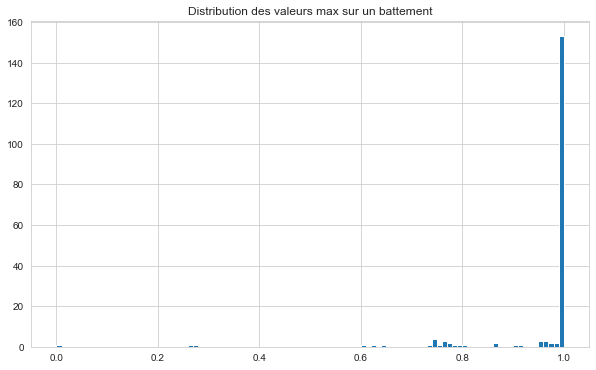

In [52]:
df_abnorm2.max(axis=0) 

plt.figure(figsize = (10,6)) 
plt.hist(df_abnorm2.max(axis=0), bins = 100)
plt.title('Distribution des valeurs max sur un battement')
#sns.barplot(x=df_norm2.max(axis=1), data=df_norm2)

In [53]:
df_abnorm2.max(axis=1)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10501    1.0
10502    1.0
10503    1.0
10504    1.0
10505    1.0
Length: 10506, dtype: float64

In [54]:
maxValueIndex = df_abnorm2.idxmax(axis = 1)
maxValueIndex.min()

0

Text(0.5, 1.0, 'Distribution du RR interval')

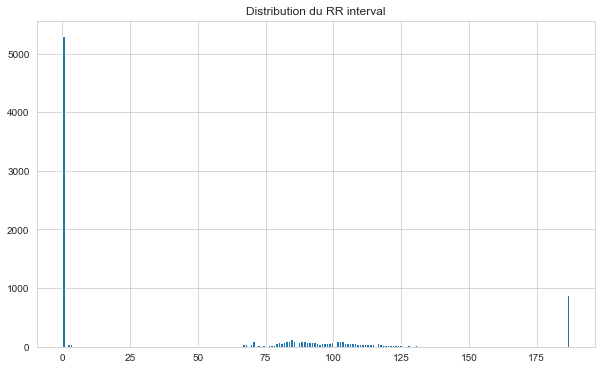

In [55]:
plt.figure(figsize = (10,6)) 
plt.hist(maxValueIndex, bins = 200)
plt.title("Distribution du RR interval")

In [56]:
# on trace le signal si le max est plus petit 

No handles with labels found to put in legend.


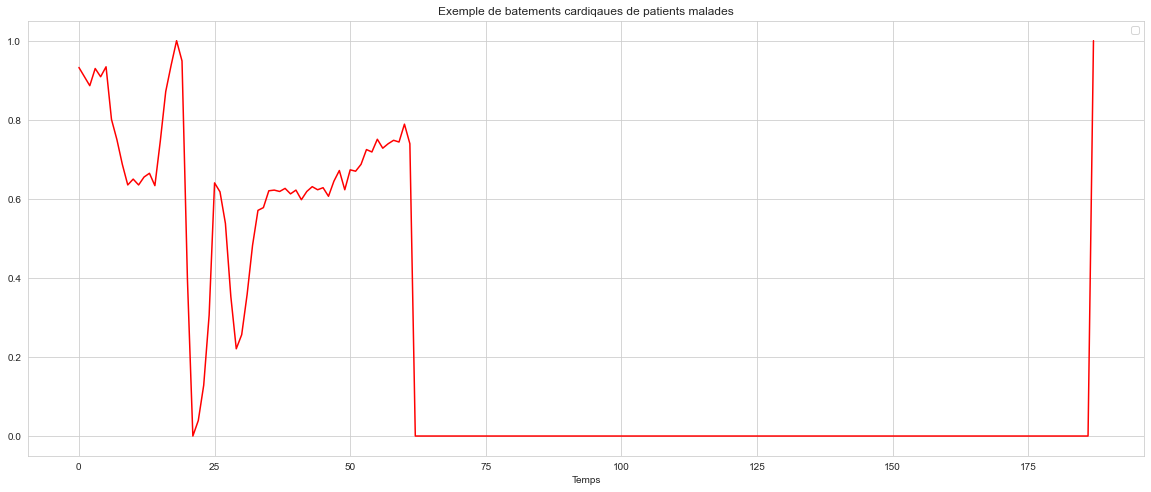

In [57]:
# exemples de battements anormaux
sns.set_style('whitegrid') 
plt.figure(figsize = (20,8)) 
plt.plot(df_abnorm2.iloc[0, 0:187], color = 'red') 
plt.xlabel('Temps')
plt.title('Exemple de batements cardiqaues de patients malades')  
plt.legend() 
plt.show()

In [58]:
plt.figure(figsize = (20,8)) 

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [59]:
range(len(df_abnorm2))

range(0, 10506)

In [60]:
#sns.relplot(x='g', y='pf', kind='line', data=df[df['g']<50]) ;

No handles with labels found to put in legend.


18


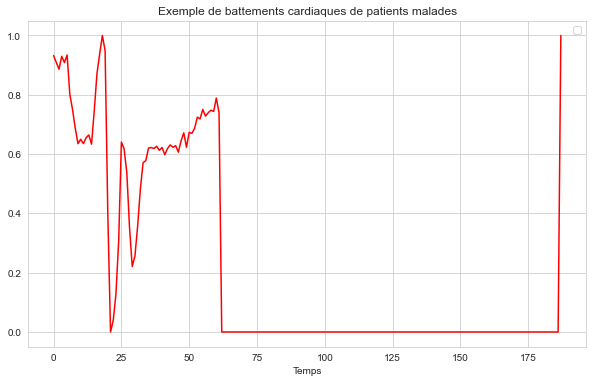

No handles with labels found to put in legend.


0


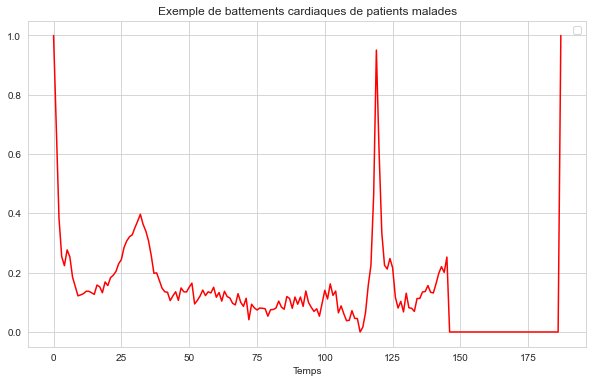

No handles with labels found to put in legend.


0


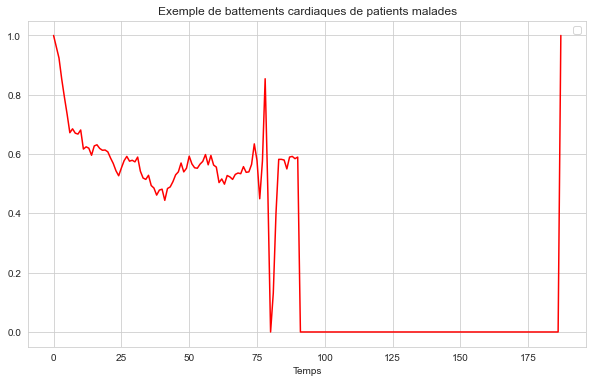

No handles with labels found to put in legend.


3


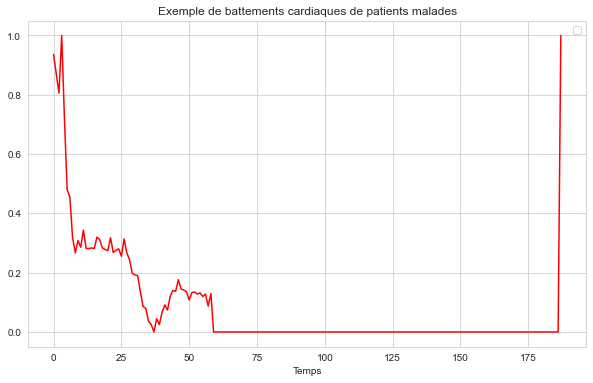

No handles with labels found to put in legend.


0


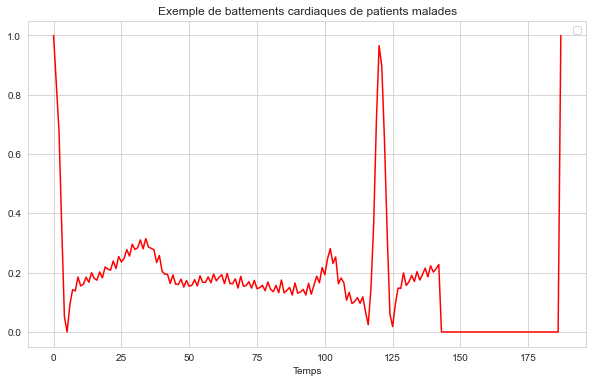

No handles with labels found to put in legend.


0


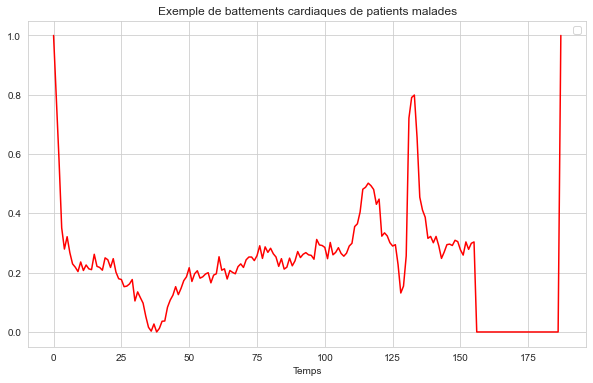

No handles with labels found to put in legend.


20


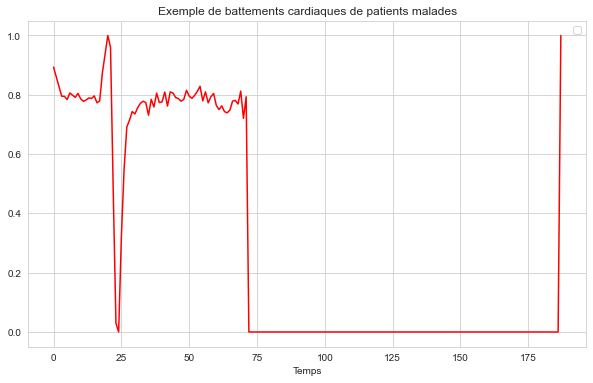

No handles with labels found to put in legend.


0


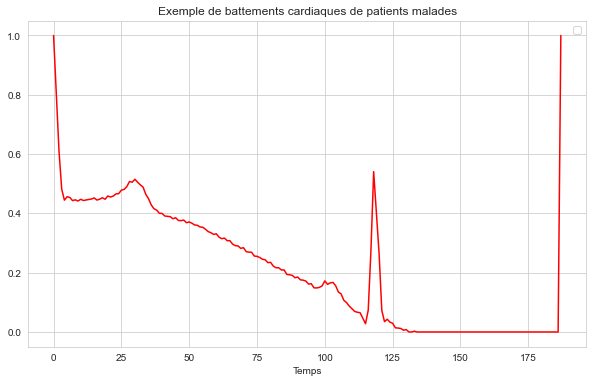

No handles with labels found to put in legend.


0


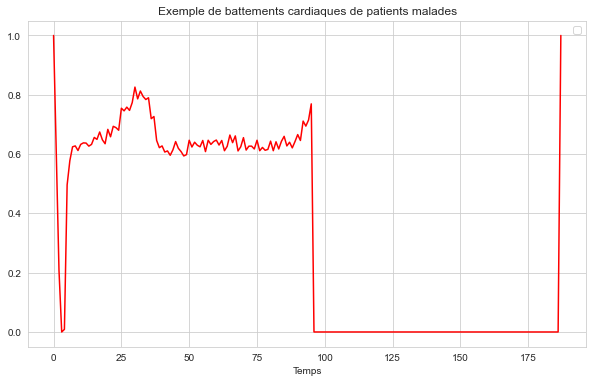

No handles with labels found to put in legend.


0


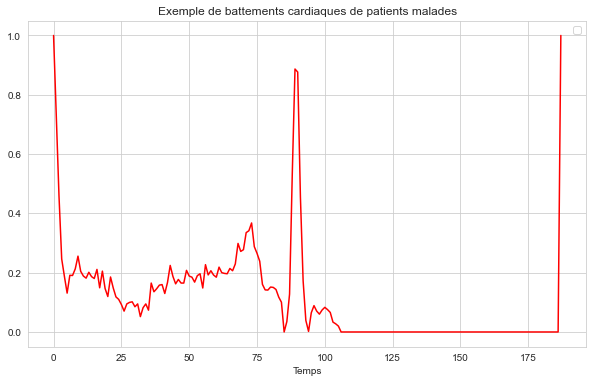

In [61]:

j=0
for i in range(len(df_norm2)) :
    if (maxValueIndex.iloc[i] < 50) & (j<10) :
        j+=1
        print(maxValueIndex.iloc[i])
        plt.figure(figsize = (10,6)) 
        plt.plot(df_abnorm2.iloc[i, 0:187], color = 'red')
        plt.xlabel('Temps')
        plt.title('Exemple de battements cardiaques de patients malades')  
        plt.legend() 
        plt.show()

No handles with labels found to put in legend.


100


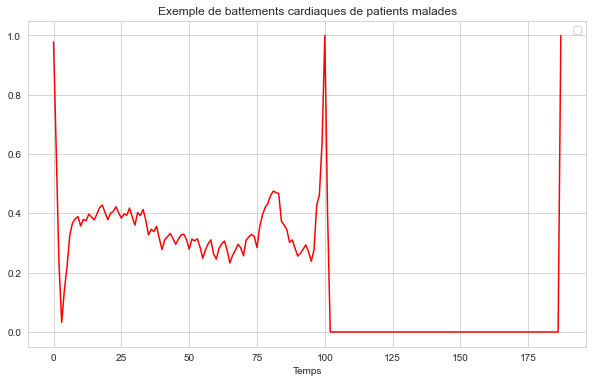

No handles with labels found to put in legend.


80


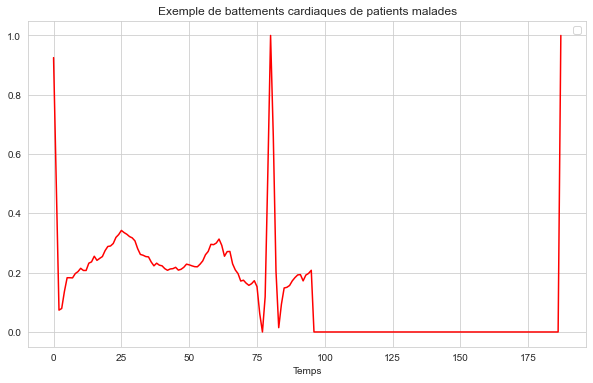

No handles with labels found to put in legend.


93


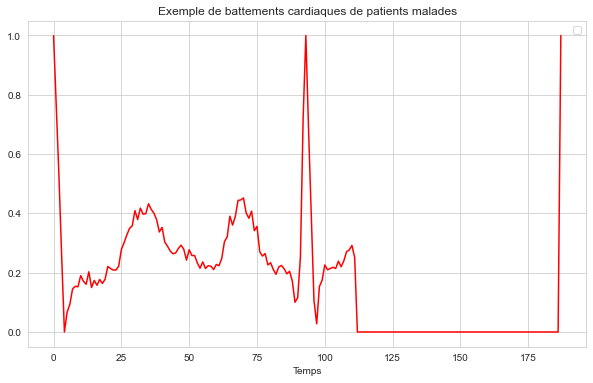

No handles with labels found to put in legend.


123


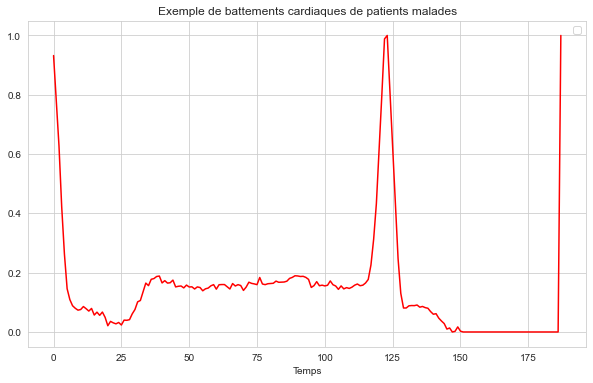

No handles with labels found to put in legend.


92


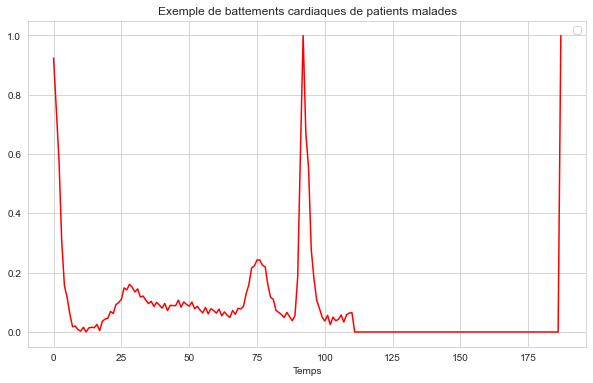

No handles with labels found to put in legend.


99


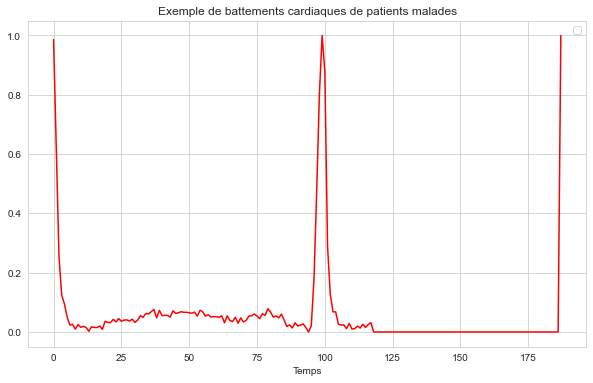

No handles with labels found to put in legend.


81


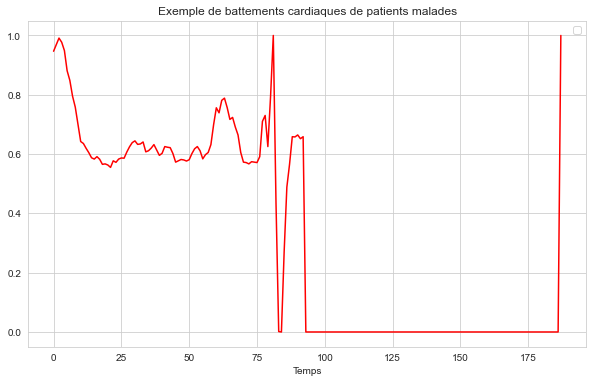

No handles with labels found to put in legend.


123


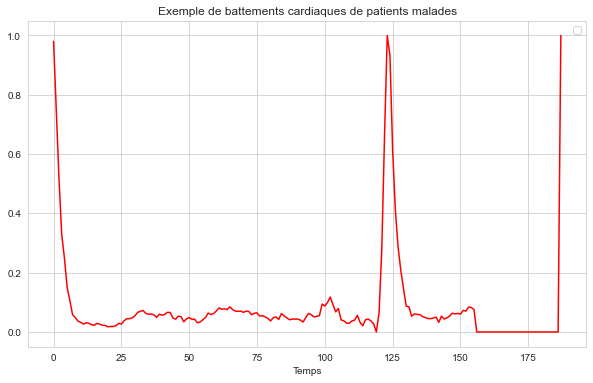

No handles with labels found to put in legend.


100


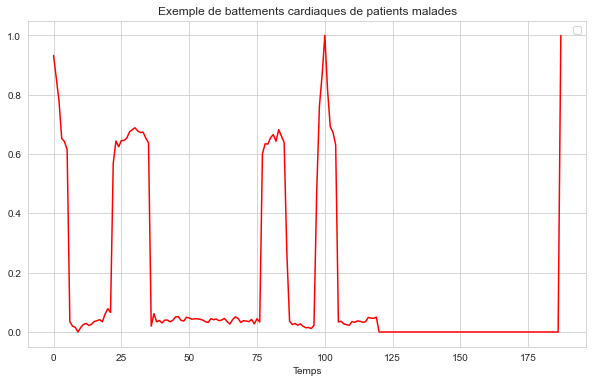

No handles with labels found to put in legend.


101


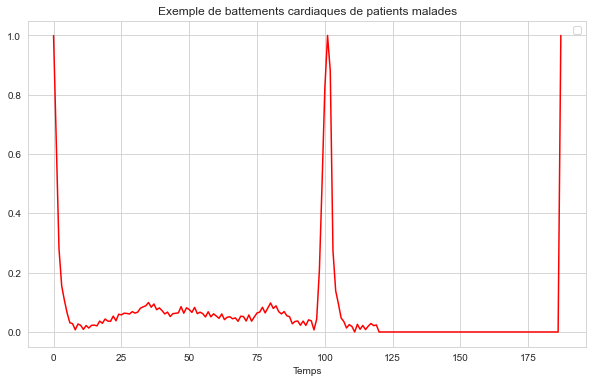

In [62]:
j=0
for i in range(len(df_abnorm2)) :
    if (maxValueIndex.iloc[i] > 50) & (maxValueIndex.iloc[i] < 150) & (j<10) :
        j+=1
        print(maxValueIndex.iloc[i])
        plt.figure(figsize = (10,6)) 
        plt.plot(df_abnorm2.iloc[i, 0:187], color = 'red')
        plt.xlabel('Temps')
        plt.title('Exemple de battements cardiaques de patients malades')  
        plt.legend() 
        plt.show()

No handles with labels found to put in legend.


187


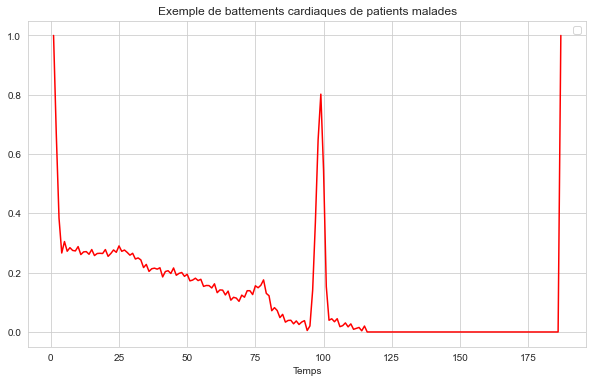

No handles with labels found to put in legend.


187


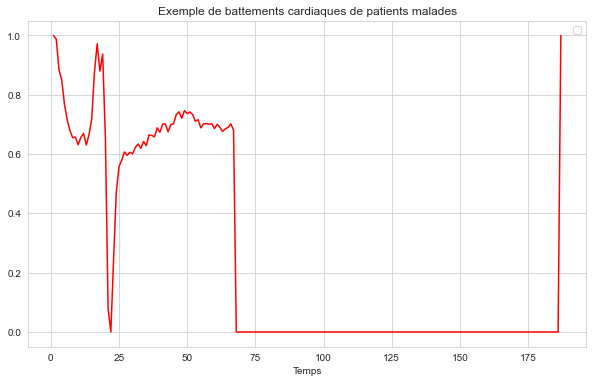

No handles with labels found to put in legend.


187


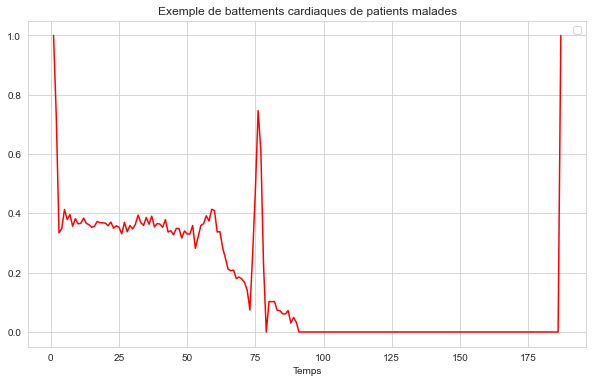

No handles with labels found to put in legend.


187


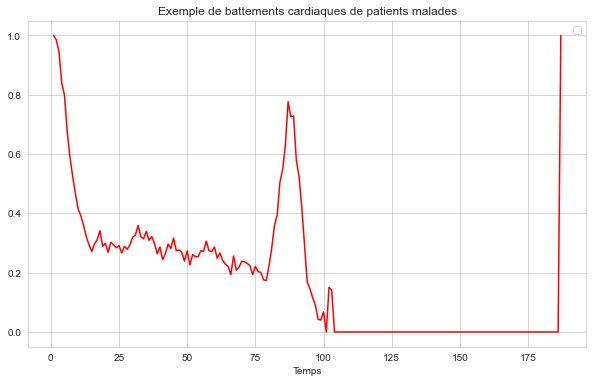

No handles with labels found to put in legend.


187


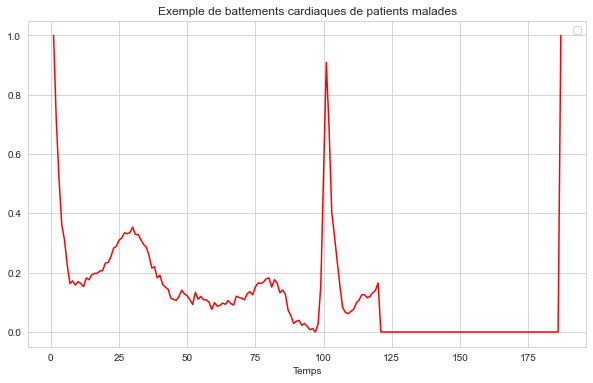

No handles with labels found to put in legend.


187


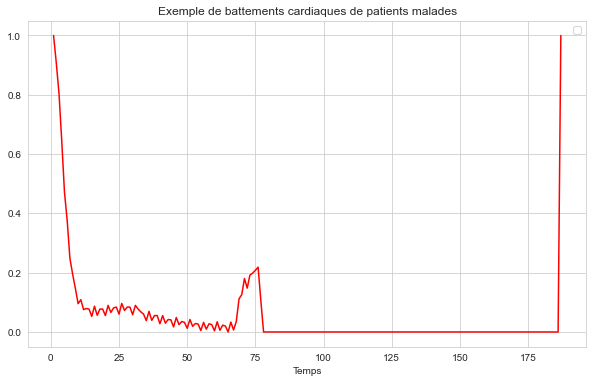

No handles with labels found to put in legend.


187


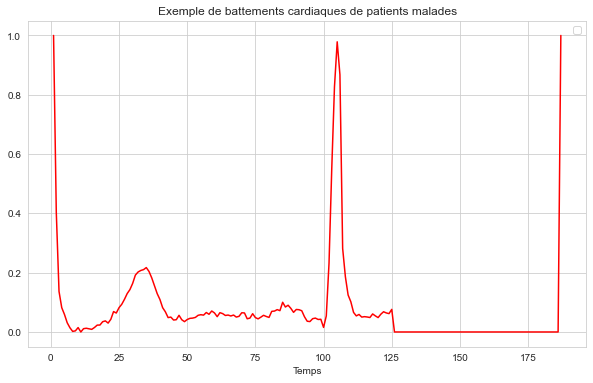

No handles with labels found to put in legend.


187


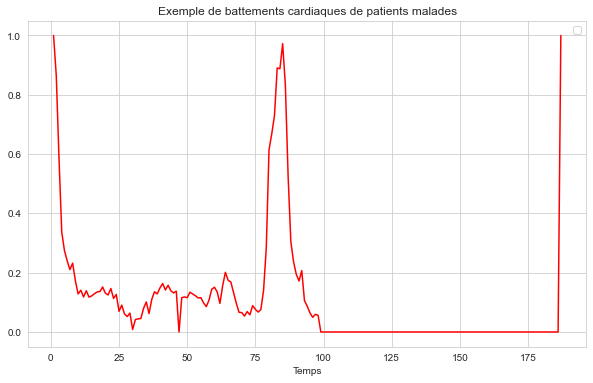

No handles with labels found to put in legend.


187


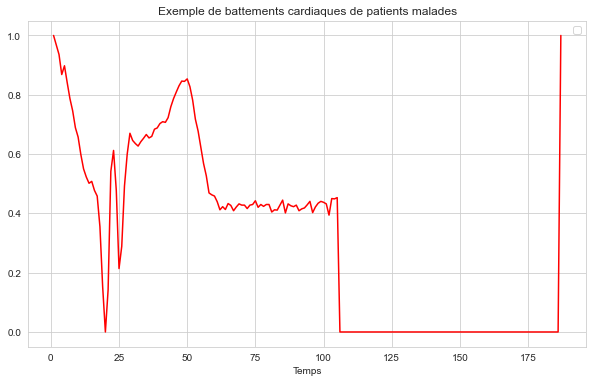

No handles with labels found to put in legend.


187


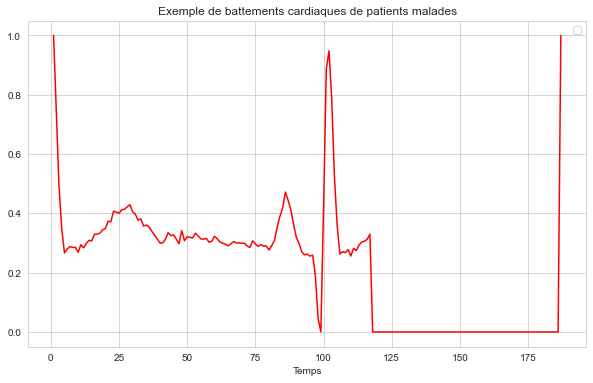

In [63]:
j=0
for i in range(len(df_norm2)) :
    if (maxValueIndex.iloc[i] > 150) & (j<10) :
        j+=1
        print(maxValueIndex.iloc[i])
        plt.figure(figsize = (10,6)) 
        plt.plot(df_norm2.iloc[i, 0:187], color = 'red')
        plt.xlabel('Temps')
        plt.title('Exemple de battements cardiaques de patients malades')  
        plt.legend() 
        plt.show()